In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime

%load_ext tensorboard
import glob
import cv2


In [2]:
training_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv")
testing_labels=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv",header=None)
testing_labels.columns=['filename']

In [3]:
training_labels['animal_type'].value_counts()


pecora    600
mucca     600
Name: animal_type, dtype: int64

In [4]:
training_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg\*.jpg'):
    n= cv2.imread(img)
    training_images.append(n)

In [5]:
testing_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg\*.jpg'):
    n= cv2.imread(img)
    testing_images.append(n)

In [6]:
if len(training_labels) == len(training_images):
    print('Number of labels i.e. ', len(training_labels), 'matches the number of filenames i.e. ', len(training_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1200 matches the number of filenames i.e.  1200


In [7]:
if len(testing_labels) == len(testing_images):
    print('Number of labels i.e. ', len(testing_labels), 'matches the number of filenames i.e. ', len(testing_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  400 matches the number of filenames i.e.  400


In [8]:
len(testing_images) 

400

In [ ]:
path1=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/"

    
images = [[fname, path1+ fname[:-4] + '.jpg'] for fname in training_labels['filename']]
train_df = pd.DataFrame(images)
train_df.columns = ['filename', 'file']
train_df['labels']=training_labels['animal_type']

def mappp(x):
    if x=="mucca":
        return 0
    else: return 1
    
train_df['labels_num']=train_df['labels'].map(mappp)
y_train=np.array(train_df['labels_num'])

In [10]:
images_train=[]
for img in train_df['file']:
    img=cv2.imread(img)
    img = cv2.resize(img, (64,64))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images_train.append(img)

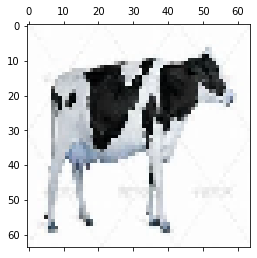

In [11]:
images_train=np.array(images_train)
plt.matshow(images_train[9])


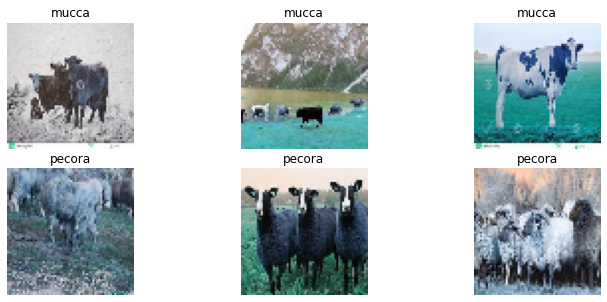

In [12]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*650 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_train[image_index], cmap='gray')
        ax[r,c].set_title(train_df['labels'][image_index])
plt.show()
plt.close()

In [ ]:

path2=r"C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg/"

images = [[fname, path2+ fname[:-4] + '.jpg'] for fname in testing_labels['filename']]
test_df = pd.DataFrame(images)
test_df.columns = ['filename', 'file']

In [14]:
images_test=[]
for img in test_df['file']:
    img=cv2.imread(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    images_test.append(img)

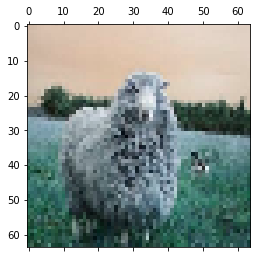

In [15]:
images_test=np.array(images_test)
plt.matshow(images_test[1])


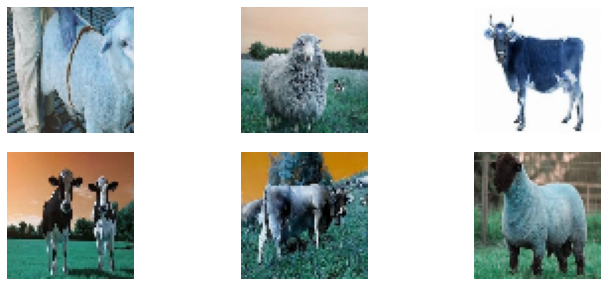

In [16]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*200 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_test[image_index], cmap='gray')
        
plt.show()
plt.close()

In [17]:
images_train.shape


(1200, 64, 64, 3)

In [18]:
images_test.shape

(400, 64, 64, 3)

In [19]:
classification=['mucca','pecora']

In [20]:
y=np.array(train_df['labels_num'])

In [21]:
y


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
INPUT_SHAPE = (64,64,3)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=70, kernel_size=(2, 2), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))






# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [23]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalHinge
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'] )

In [24]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(train_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


In [25]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [27]:
train_generator = train_datagen.flow_from_dataframe(train_df,r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=32, target_size=(64,64))

Found 960 validated image filenames belonging to 2 classes.


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=5, target_size=(64,64))



Found 240 validated image filenames belonging to 2 classes.


In [29]:
# history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
#    epochs=20, verbose=0)

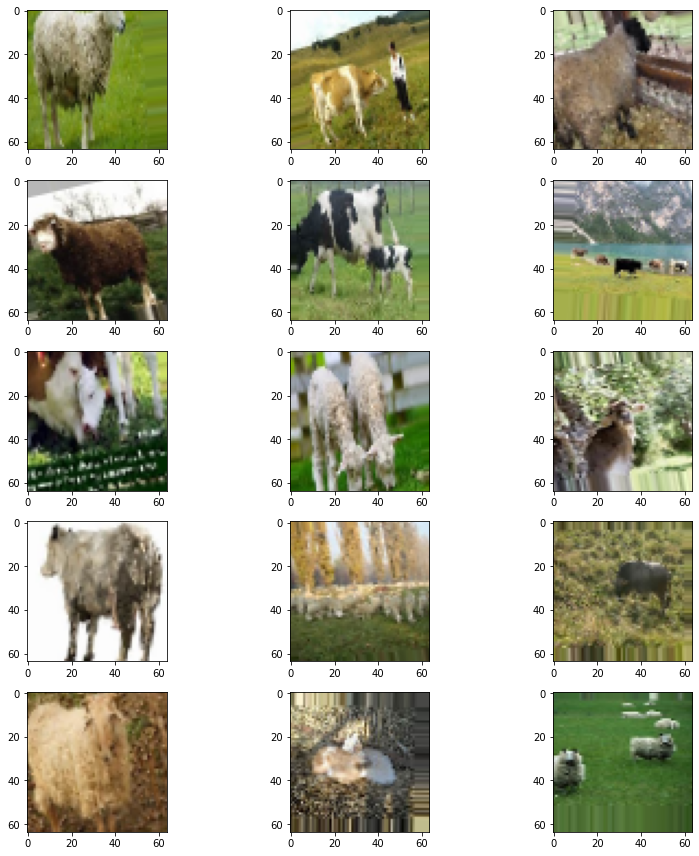

In [30]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [31]:
example_df = train_df.sample(n=2).reset_index(drop=True)
example_df.head()
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\train\train_beg/', 
    x_col='filename',
    y_col='labels',
    target_size=(64,64),
    class_mode='categorical'
)


Found 2 validated image filenames belonging to 1 classes.


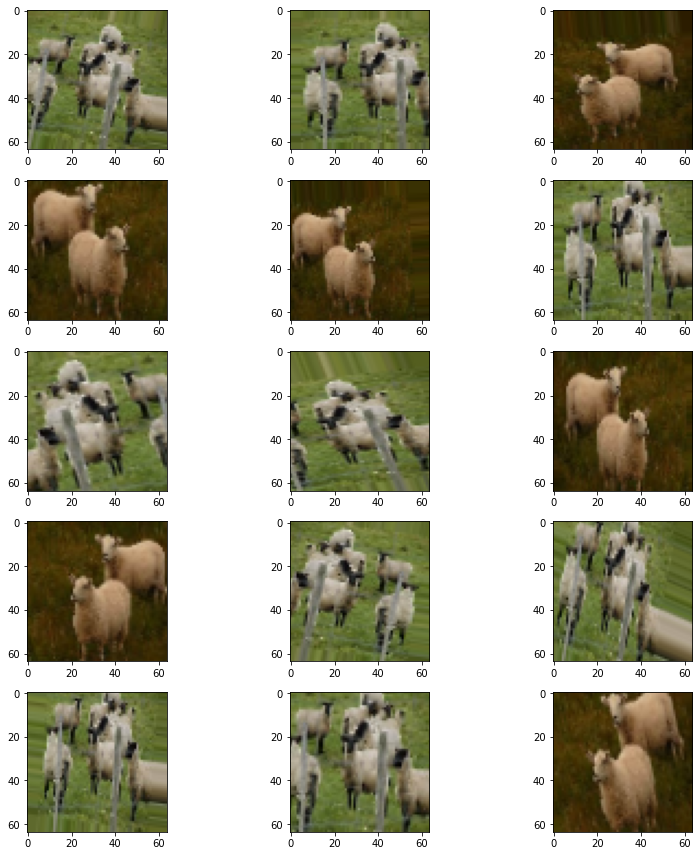

In [32]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [33]:
EPOCHS = 20

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=1)
history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[es_callback]
)


Epoch 1/20
30/30 [==============================] - 5s 170ms/step - loss: 0.7214 - accuracy: 0.5115 - val_loss: 0.6664 - val_accuracy: 0.6000
Epoch 2/20
30/30 [==============================] - 5s 154ms/step - loss: 0.6857 - accuracy: 0.5479 - val_loss: 0.6700 - val_accuracy: 0.5714
Epoch 3/20
30/30 [==============================] - 5s 155ms/step - loss: 0.6659 - accuracy: 0.6031 - val_loss: 0.6434 - val_accuracy: 0.6857
Epoch 4/20
30/30 [==============================] - 5s 152ms/step - loss: 0.6482 - accuracy: 0.6177 - val_loss: 0.5740 - val_accuracy: 0.7714
Epoch 5/20
30/30 [==============================] - 5s 160ms/step - loss: 0.6443 - accuracy: 0.6313 - val_loss: 0.5769 - val_accuracy: 0.6571
Epoch 6/20
30/30 [==============================] - 5s 163ms/step - loss: 0.6279 - accuracy: 0.6385 - val_loss: 0.5758 - val_accuracy: 0.6571
Epoch 7/20
30/30 [==============================] - 5s 155ms/step - loss: 0.6199 - accuracy: 0.6635 - val_loss: 0.5180 - val_accuracy: 0.8286
Epoch 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 70)        910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 70)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30870)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                987872    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [35]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r'C:\Users\Meena\Desktop\Dphi\bootcamp\Assignment_2\test\test_beg/', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    batch_size=batch_size,
    shuffle=False
)

Found 400 validated image filenames.


In [36]:
y_predict=model.predict(test_generator)


In [37]:
n=np.round(y_predict)

In [38]:
# final=[]
# for i in range(0,len(images_test)):
#     final.append(np.argmax(y_predict[i]))
    

In [39]:
n

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],

In [40]:
g=pd.DataFrame(n)
g[0]=g[0].replace({1.0:'pecora',0.0:'mucca'})
g

,0
0,pecora
1,pecora
2,mucca
3,mucca
4,pecora
...,...
395,pecora
396,pecora
397,mucca
398,pecora


In [41]:
res = g #target is nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]


res.to_csv("anim1.csv")

In [42]:
model.save('saved_model/my_model_cnn1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model_cnn1\assets
